In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      #1 is fault 0 is actual
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost

#change the location first
Ref_case = pd.read_csv(r'E:\Thesis\transformer data 36\Ref_case_13.csv')
Site_case = pd.read_csv(r'E:\Thesis\transformer data 36\site_case_13.csv')

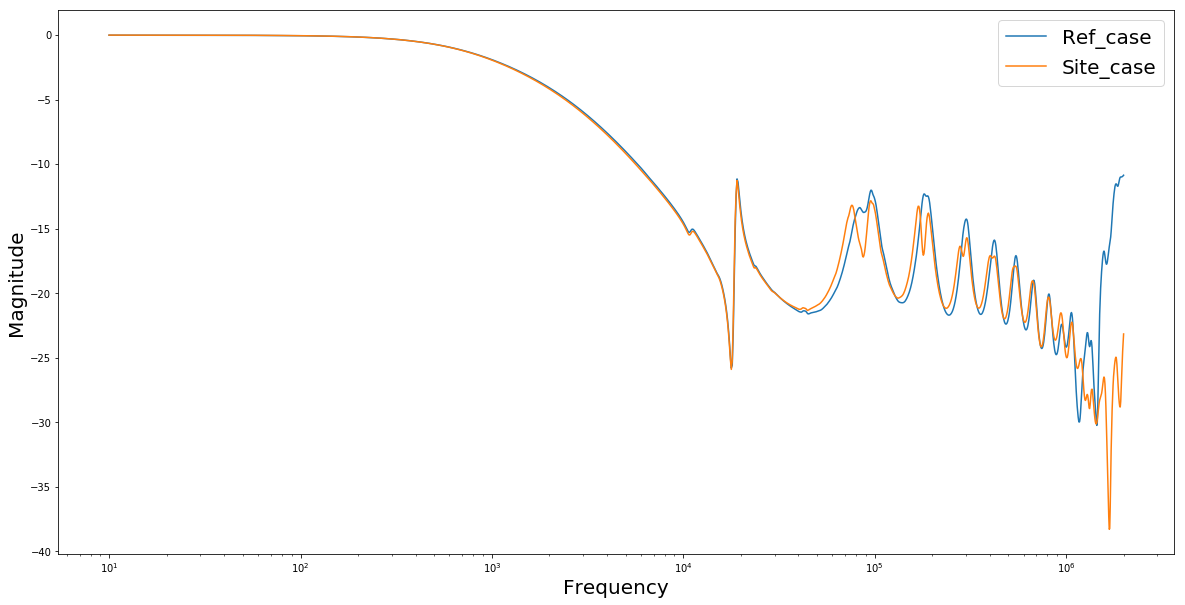

In [2]:
plt.figure(figsize=(20,10))
a = plt.plot(Ref_case['Frequency'], Ref_case['Magnitude'], label='Ref_case')
b = plt.plot(Site_case['Frequency'], Site_case['Magnitude'], label= 'Site_case')
plt.xscale('log')
plt.xlabel('Frequency', fontsize = 20)
plt.ylabel('Magnitude', fontsize = 20)
plt.legend(fontsize = 20)

In [3]:
Ref_case=np.array(Ref_case)
Site_case= np.array(Site_case)

In [4]:
case= np.vstack([Ref_case,Site_case])

In [5]:
case.shape

(2132, 2)

In [6]:
X = case[:, :2]

In [7]:
X.shape

(2132, 2)

In [8]:
X = X.reshape(-1,41)
X.shape

(104, 41)

In [9]:
X.shape, X[0]

((104, 41),
 array([ 9.9884300e+00, -6.8560000e-03,  1.0477400e+01, -7.0650000e-03,
         1.0966300e+01, -7.1340000e-03,  1.1478600e+01, -7.2730000e-03,
         1.2014100e+01, -7.3340000e-03,  1.2596100e+01, -7.5340000e-03,
         1.3178200e+01, -7.6820000e-03,  1.3806900e+01, -8.1160000e-03,
         1.4458800e+01, -7.9160000e-03,  1.5134000e+01, -8.4640000e-03,
         1.5855800e+01, -8.4990000e-03,  1.6600800e+01, -8.5860000e-03,
         1.7369200e+01, -8.5420000e-03,  1.8207399e+01, -9.1250000e-03,
         1.9045500e+01, -9.0990000e-03,  1.9953600e+01, -9.2560000e-03,
         2.0884899e+01, -9.4900000e-03,  2.1886101e+01, -9.7770000e-03,
         2.2910500e+01, -1.0221000e-02,  2.3981600e+01, -1.0177000e-02,
         2.5122400e+01]))

In [10]:
y = np.zeros((104))
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [11]:
y[52:] = 1

In [12]:
y.shape

(104,)

In [13]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [16]:
test_size= .25
seed= 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [17]:
# fit model no training data
model = xgboost.XGBClassifier(learning_rate =0.0001, n_estimators=1, max_depth=4, min_child_weight=5, gamma=0.8, subsample=0.1
          ,colsample_bytree=0.1, nthread=2, scale_pos_weight=1)
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.1, gamma=0.8, learning_rate=0.0001,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=1, n_jobs=1, nthread=2, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.1)
Accuracy: 53.85%


In [18]:
predictions= model.predict(X_test)
print(accuracy_score(y_test, predictions)*100,'%')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

53.84615384615385 %
[[14  0]
 [12  0]]
              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70        14
         1.0       0.00      0.00      0.00        12

   micro avg       0.54      0.54      0.54        26
   macro avg       0.27      0.50      0.35        26
weighted avg       0.29      0.54      0.38        26



C:\Users\ayub_\Miniconda3\envs\py3k\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
